In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']
cpalette='Set2'
sns.color_palette(cpalette, n_colors=5)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [3]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [4]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

In [5]:
df_het_predicted_classes = pd.read_csv('../results/monte_het_minmse.csv.gz')

In [6]:
df_het_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,VPRO,VPRO_cluster,RMSE_clip
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.933762,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,11A0,Roseovarius 5C3,Weak,4.621448,30.284159,74.0,11.830328,vpro_12_88_EXOENZYME_C2,C2,11.830328
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986309,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,1B0,Axenic,Axenic,2.342476,52.057268,74.0,11.042775,vpro_13_4_EXOENZYME_C3,C3,11.042775
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.988574,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,1B0,Axenic,Axenic,2.137782,47.880754,74.0,10.117244,vpro_13_4_EXOENZYME_C3,C3,10.117244
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.973069,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,7B0,Sulfitobacter pseudonitzschiae,Sustained,2.548766,24.861325,74.0,7.960258,vpro_13_69_EXOENZYME_C1,C1,7.960258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.988767,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535,11A0,Roseovarius 5C3,Weak,4.590178,37.560730,74.0,13.130516,vpro_93_82_ROS_C1,C1,13.130516
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535,10C0,Marinovum 5F3,Weak,2.031882,22.689852,74.0,6.789926,vpro_96_60_ROS_C1,C1,6.789926
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535,10C0,Marinovum 5F3,Weak,2.074992,22.349891,74.0,6.809981,vpro_96_60_ROS_C1,C1,6.809981
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990635,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535,10C0,Marinovum 5F3,Weak,4.263308,36.547564,74.0,12.482529,vpro_97_23_ROS_C1,C1,12.482529


In [7]:
df_vpros = df_het_predicted_classes[['VPRO', 'VPRO_cluster']].drop_duplicates()
df_vpros

,VPRO,VPRO_cluster
0,vpro_11_62_EXOENZYME_C1,C1
1,vpro_12_88_EXOENZYME_C2,C2
2,vpro_13_4_EXOENZYME_C3,C3
4,vpro_13_69_EXOENZYME_C1,C1
5,vpro_17_89_EXOENZYME_C2,C2
...,...,...
39563,vpro_89_60_ROS_C2,C2
39566,vpro_90_89_ROS_C0,C0
39570,vpro_93_82_ROS_C1,C1
39573,vpro_96_60_ROS_C1,C1


In [8]:
df_vpros['base_vpro'] = df_vpros.VPRO.str.replace('_C[0-9]', '', regex=True)

In [9]:
df_ponly_predicted_classes = pd.read_csv('monte_ponly_predicted_classes.csv.gz')
df_fponly = pd.read_csv('features_monte_ponly_clean.csv.gz')
df_fhet = pd.read_csv('features_monte_het_clean.csv.gz')
df_ftrain = pd.read_csv('features_training.csv.gz')

In [10]:
df_fponly.columns

Index(['run_id', 'idx', 'model', 'media', 'max_Nday', 'max_Nbiomass',
       'max_Cday', 'max_Cbiomass', 'median_30-60days_Nbiomass',
       'median_30-60days_Cbiomass', 'median_60-80days_Nbiomass',
       'median_60-80days_Cbiomass'],
      dtype='object')

In [11]:
df_fponly = df_fponly.melt(id_vars=['run_id', 'idx', 'model', 'media',], value_vars=['max_Nday', 'max_Nbiomass',
       'max_Cday', 'max_Cbiomass', 'median_30-60days_Nbiomass',
       'median_30-60days_Cbiomass', 'median_60-80days_Nbiomass',
       'median_60-80days_Cbiomass',])

In [12]:
idx_s = df_ponly_predicted_classes.idx.str.replace('monte_ponly_','vpro_', regex=False).str.replace('_monte__','_', regex=False)
for m in morder:
    idx_s = idx_s.str.replace(f'_{m}_','_', regex=False)
idx_s

df_ponly_predicted_classes['base_vpro'] = idx_s


In [13]:
df_ponly_predicted_classes = pd.merge(df_ponly_predicted_classes, df_vpros, on='base_vpro', how='left')

In [14]:
df_fponly = pd.merge(df_fponly, df_ponly_predicted_classes, on=['idx', 'run_id', 'model'], how='left')

In [15]:
df_fhet = pd.merge(df_fhet, df_het_predicted_classes, 
         on=['run_id',], how='left', suffixes=['', '_y'])

In [16]:
df_fponly

,run_id,idx,model,media,variable,value,y_pred,max_prob,base_vpro,VPRO,VPRO_cluster
0,monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,lowN,max_Nday,0.000000,Inhibited,0.993409,vpro_100_0_EXOENZYME,NaN,NaN
1,monte_ponly_EXOENZYME_100_monte__0_pro99_ponly...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,pro99,max_Nday,0.000000,NaN,NaN,NaN,NaN,NaN
2,monte_ponly_EXOENZYME_100_monte__10_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,lowN,max_Nday,12.830556,Other,0.784213,vpro_100_10_EXOENZYME,NaN,NaN
3,monte_ponly_EXOENZYME_100_monte__10_pro99_ponl...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,pro99,max_Nday,20.008333,NaN,NaN,NaN,NaN,NaN
4,monte_ponly_EXOENZYME_100_monte__11_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__11_EXOENZYME,EXOENZYME,lowN,max_Nday,69.802083,Sustained,0.973440,vpro_100_11_EXOENZYME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
797851,monte_ponly_ROS_9_monte__98_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__98_ROS,ROS,pro99,median_60-80days_Cbiomass,119.230793,NaN,NaN,NaN,NaN,NaN
797852,monte_ponly_ROS_9_monte__99_lowN_ponly_ROS_h-2...,monte_ponly_ROS_9_monte__99_ROS,ROS,lowN,median_60-80days_Cbiomass,18.435186,Inhibited,0.983122,vpro_9_99_ROS,NaN,NaN
797853,monte_ponly_ROS_9_monte__99_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__99_ROS,ROS,pro99,median_60-80days_Cbiomass,17.730396,NaN,NaN,NaN,NaN,NaN
797854,monte_ponly_ROS_9_monte__9_lowN_ponly_ROS_h-20...,monte_ponly_ROS_9_monte__9_ROS,ROS,lowN,median_60-80days_Cbiomass,1.000000,Inhibited,0.993409,vpro_9_9_ROS,NaN,NaN


In [17]:
df_fponly.columns

Index(['run_id', 'idx', 'model', 'media', 'variable', 'value', 'y_pred',
       'max_prob', 'base_vpro', 'VPRO', 'VPRO_cluster'],
      dtype='object')

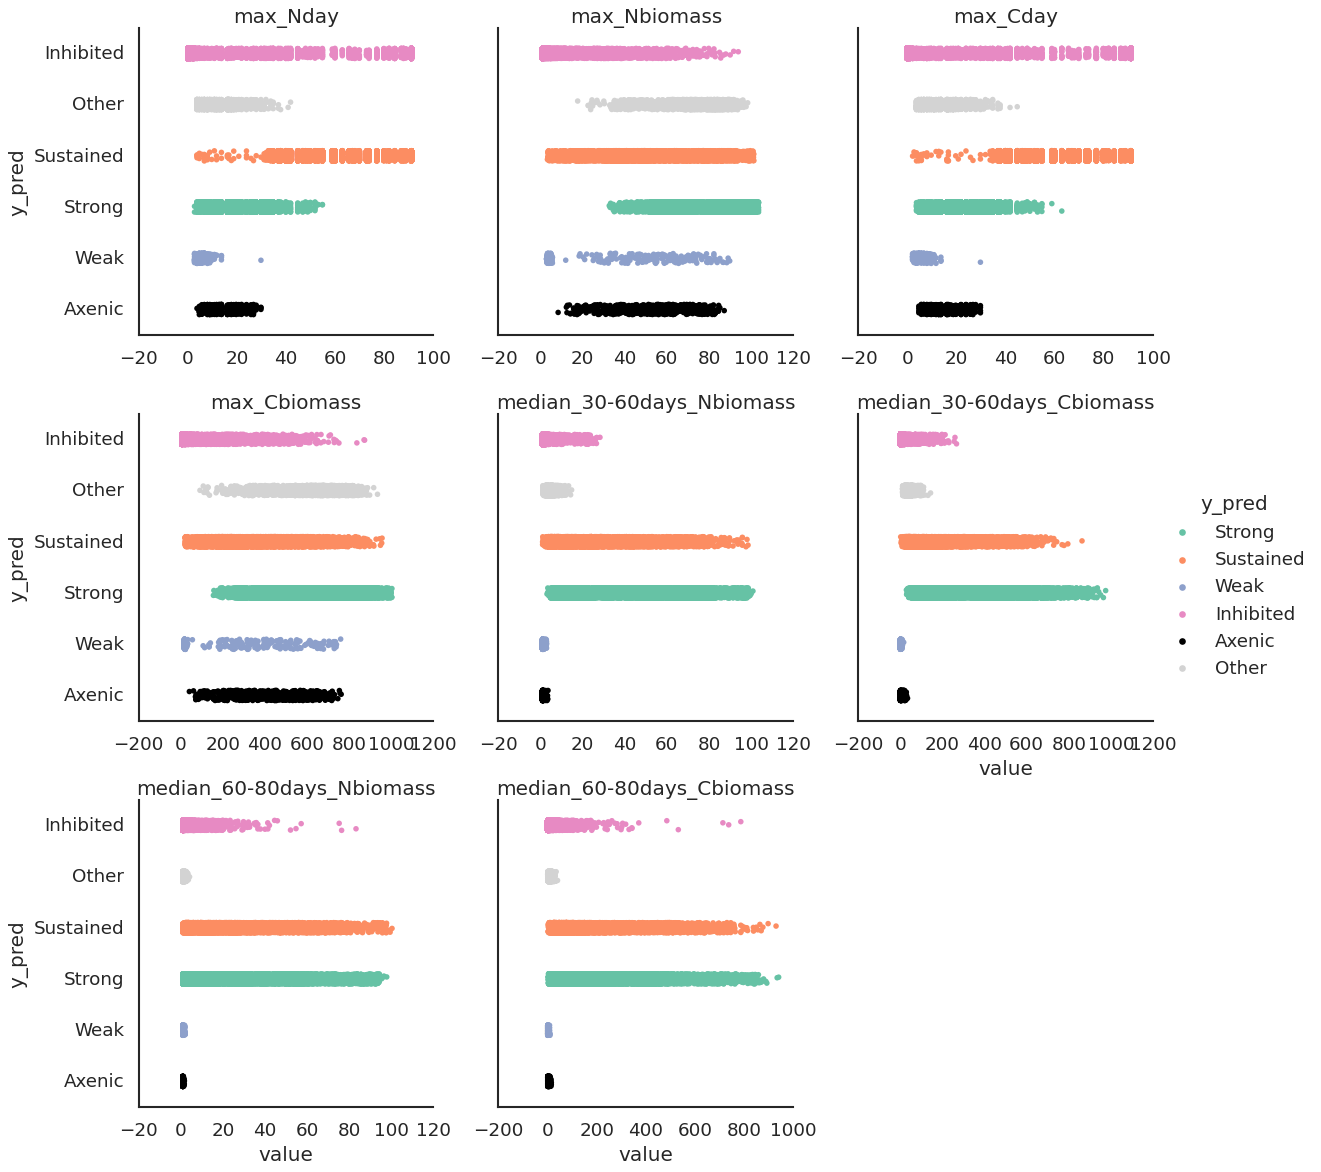

In [18]:
sns.set_context('talk')
g = sns.catplot(
    data=df_fponly.loc[df_fponly.media.isin(['lowN'])],
    y='y_pred', 
    x='value',
    col='variable', col_wrap=3,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False
)
    
g.set_titles(col_template='{col_name}')
            

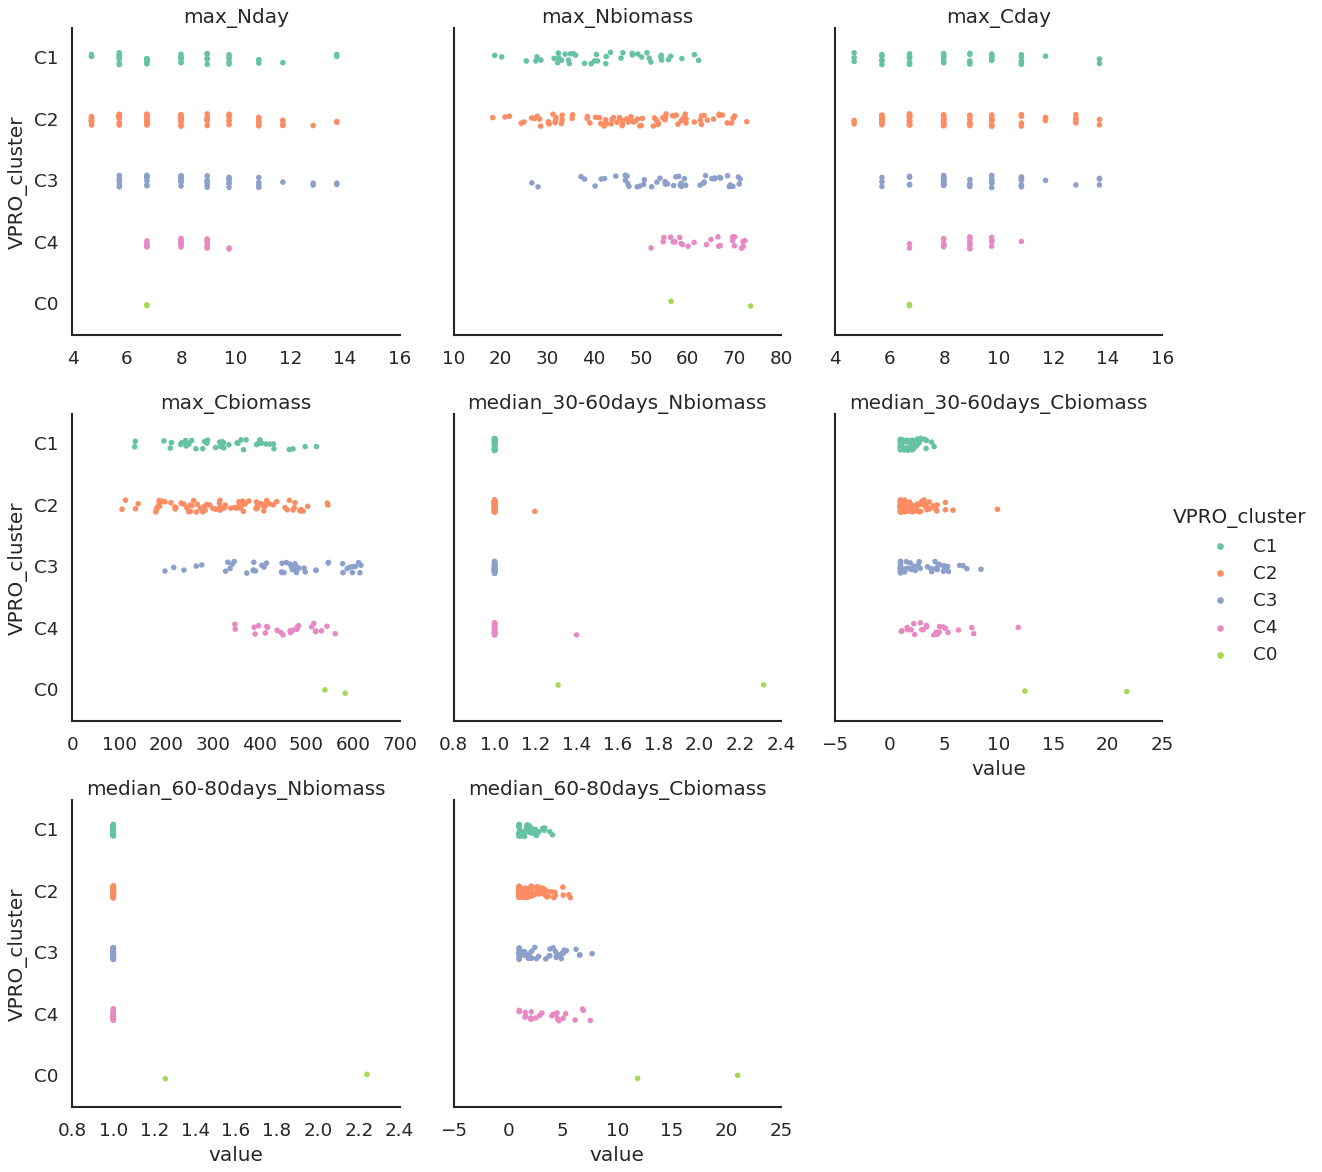

In [19]:
sns.set_context('talk')
g = sns.catplot(
    data=df_fponly.loc[df_fponly.media.isin(['lowN'])],
    y='VPRO_cluster', order=corder, 
    x='value',
    col='variable', col_wrap=3,
    hue='VPRO_cluster', hue_order=corder, palette=cpalette,
    sharex=False
)
    
g.set_titles(col_template='{col_name}')
            

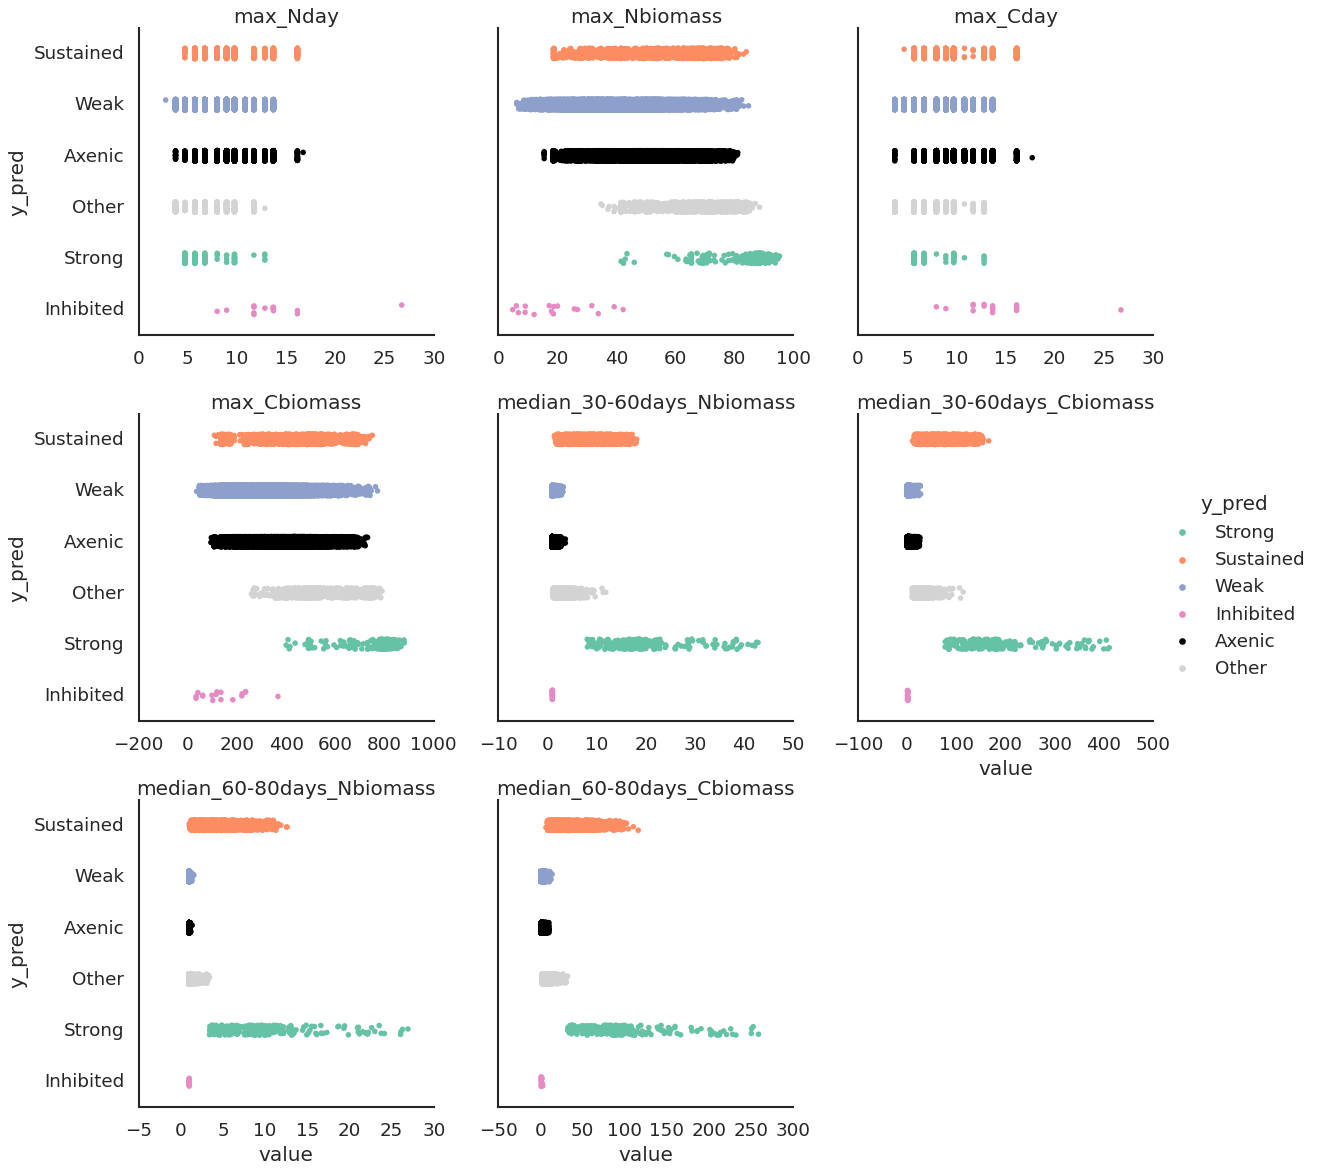

In [20]:
sns.set_context('talk')
g = sns.catplot(
    data=df_fhet,
    y='y_pred', 
    x='value',
    col='variable', col_wrap=3,
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False
)
    
g.set_titles(col_template='{col_name}')
            

In [21]:
df_fhet

,run_id,variable,value,y_pred,max_prob,idx,media,which,model,hash,...,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,VPRO,VPRO_cluster,RMSE_clip
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nday,5.720139,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
1,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nbiomass,48.478110,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cday,5.720139,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
3,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cbiomass,399.217701,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
4,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,median_30-60days_Nbiomass,4.206716,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394787,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,max_Cbiomass,163.130351,Weak,0.988992,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535,...,11B0,Roseovarius 5C3,Weak,2.237044,18.039775,74.0,6.352619,vpro_97_23_ROS_C1,C1,6.352619
394788,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,median_30-60days_Nbiomass,1.000000,Weak,0.988992,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535,...,11B0,Roseovarius 5C3,Weak,2.237044,18.039775,74.0,6.352619,vpro_97_23_ROS_C1,C1,6.352619
394789,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,median_30-60days_Cbiomass,1.000000,Weak,0.988992,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535,...,11B0,Roseovarius 5C3,Weak,2.237044,18.039775,74.0,6.352619,vpro_97_23_ROS_C1,C1,6.352619
394790,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,median_60-80days_Nbiomass,1.000000,Weak,0.988992,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535,...,11B0,Roseovarius 5C3,Weak,2.237044,18.039775,74.0,6.352619,vpro_97_23_ROS_C1,C1,6.352619


In [22]:
df_fref = df_ftrain.loc[df_ftrain.type.isin(['ref'])]

In [23]:
df_fhet['type'] = 'CC'
df_fponly['type'] = 'AX'


In [24]:
df_fvpro = df_fponly.loc[df_fponly.media.isin(['lowN']) & ~df_fponly.VPRO.isna()].copy()

In [49]:
df_fvpro['type'] = 'VPRO'
df_fvpro['y_pred'] = 'Axenic'
df_fvpro['Group'] = 'Axenic'


In [50]:
df_f = pd.concat([df_fhet, df_fvpro, df_fref], ignore_index=True)

In [51]:
df_f

,run_id,variable,value,y_pred,max_prob,idx,media,which,model,hash,...,RMSE,VPRO,VPRO_cluster,RMSE_clip,type,base_vpro,train_Group,id,Experiment,smt_id
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nday,5.720139,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943,CC,NaN,NaN,NaN,NaN,NaN
1,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nbiomass,48.478110,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943,CC,NaN,NaN,NaN,NaN,NaN
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cday,5.720139,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943,CC,NaN,NaN,NaN,NaN,NaN
3,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cbiomass,399.217701,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943,CC,NaN,NaN,NaN,NaN,NaN
4,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,median_30-60days_Nbiomass,4.206716,Sustained,0.971477,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,...,14.026943,vpro_11_62_EXOENZYME_C1,C1,14.026943,CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396683,NaN,median_60-80days_Cbiomass,4.350027,Weak,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ref,NaN,Weak,10,10CC,NaN
396684,NaN,median_60-80days_Cbiomass,5.903609,Weak,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ref,NaN,Weak,10,10CC,NaN
396685,NaN,median_60-80days_Cbiomass,6.680399,Weak,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ref,NaN,Weak,11,10CC,NaN
396686,NaN,median_60-80days_Cbiomass,8.233980,Weak,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ref,NaN,Weak,11,10CC,NaN


In [35]:
df_fvpro.y_pred.value_counts() /8

Axenic    198.0
Name: y_pred, dtype: float64

In [40]:
df_f.loc[df_f.variable.isin(['max_Nbiomass'])].pivot_table(index=['y_pred', 'type'], columns=[ 'variable'], values='value', aggfunc=['mean', 'std', 'min', 'max']).to_excel('features.xlsx')

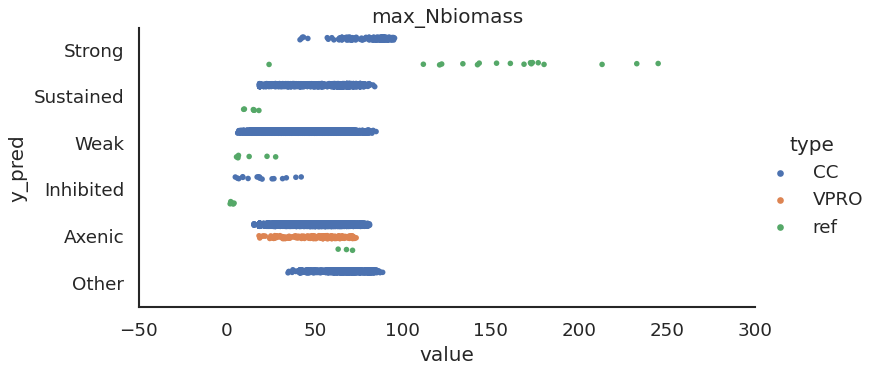

In [47]:
sns.set_context('talk')
g = sns.catplot(
    data=df_f.loc[df_f.variable.isin(['max_Nbiomass'])],
    y='y_pred', order=gorder,
    x='value',
    col='variable', #col_wrap=3,
    hue='type', #hue_order=gorder, palette=gpalette,
    dodge=True,
    sharex=False, 
    aspect=2,
)
    
g.set_titles(col_template='{col_name}')
            

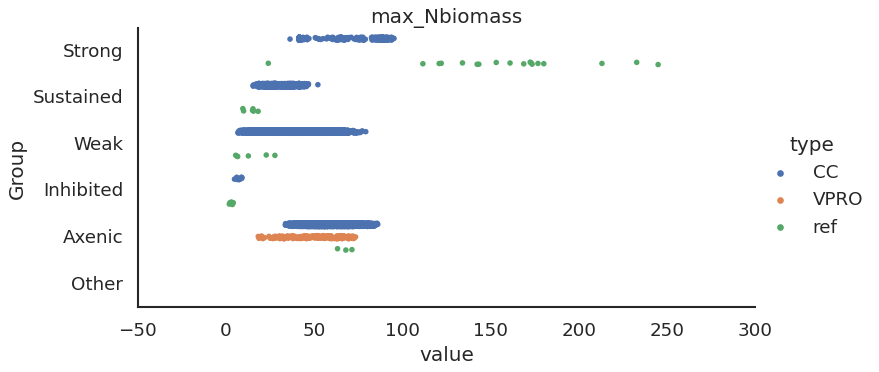

In [53]:
sns.set_context('talk')
g = sns.catplot(
    data=df_f.loc[df_f.variable.isin(['max_Nbiomass'])],
    y='Group', 
    x='value',order=gorder,
    col='variable', #col_wrap=3,
    hue='type', #hue_order=gorder, palette=gpalette,
    dodge=True,
    sharex=False, 
    aspect=2,
)
    
g.set_titles(col_template='{col_name}')
            

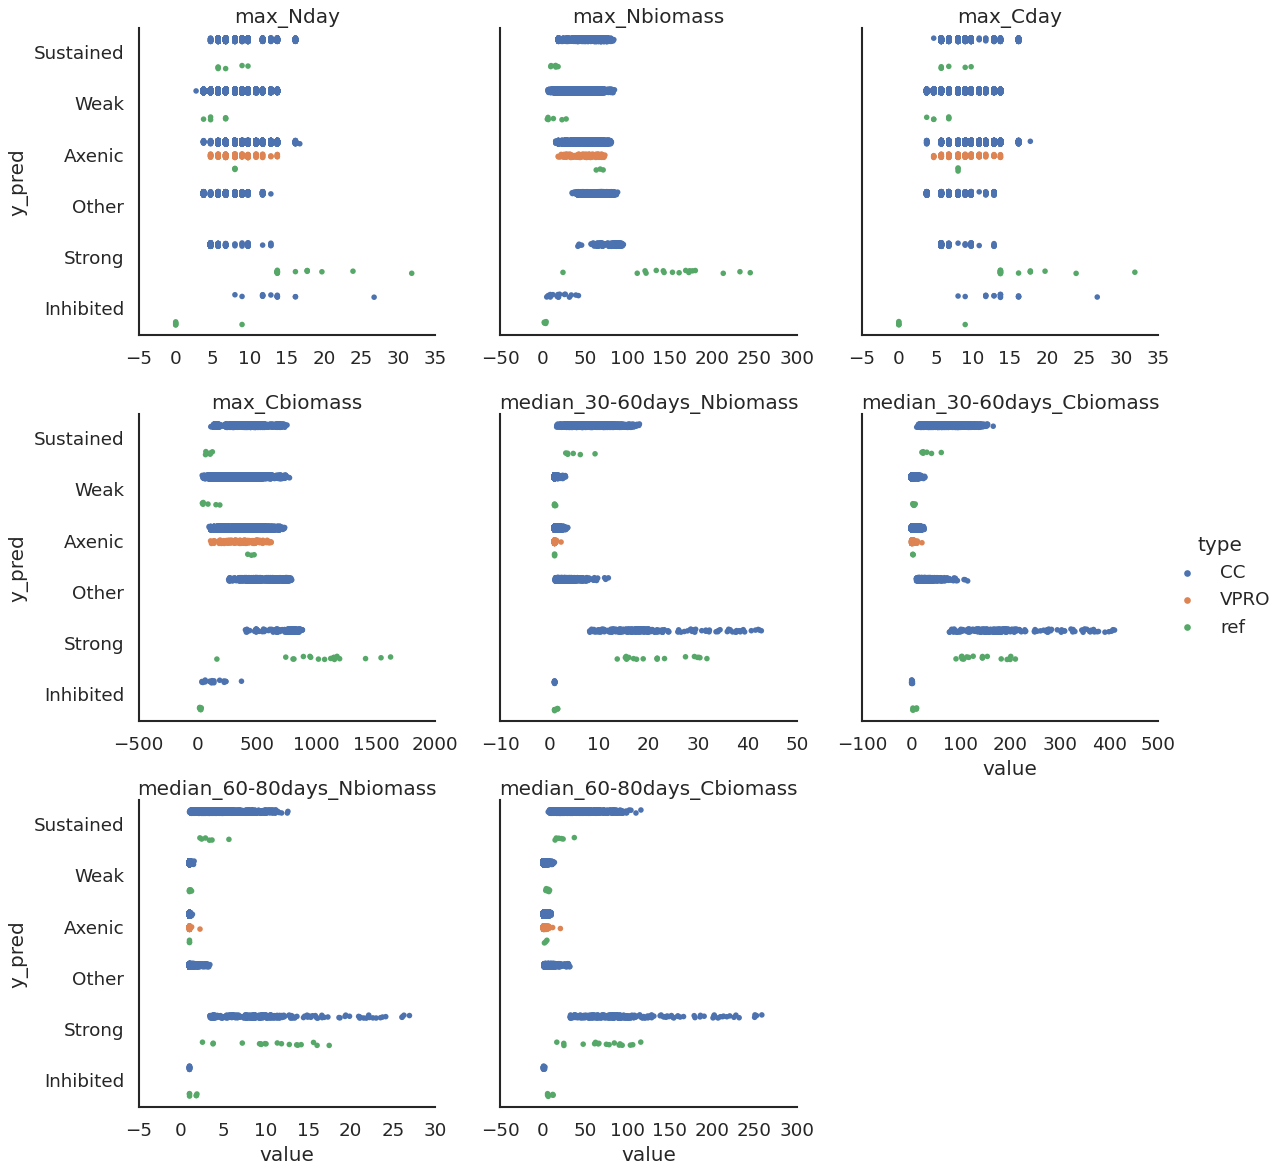

In [36]:
sns.set_context('talk')
g = sns.catplot(
    data=df_f,
    y='y_pred', 
    x='value',
    col='variable', col_wrap=3,
    hue='type', #hue_order=gorder, palette=gpalette,
    dodge=True,
    sharex=False
)
    
g.set_titles(col_template='{col_name}')
            